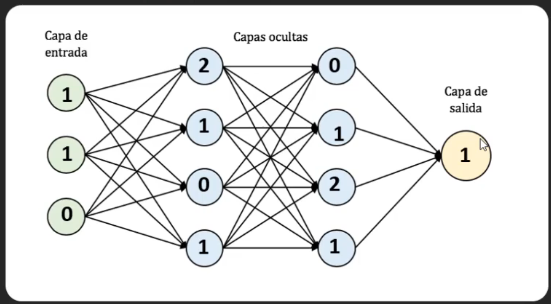

In [1]:
import cv2
import numpy as np
import os
import imutils 
from time import time


In [8]:
ruidos = cv2.CascadeClassifier('../Libraries/haarcascades/haarcascade_frontalface_default.xml')
modelo = '../Data/Images/Marcos'
if not os.path.exists(modelo):
    os.makedirs(modelo)

In [9]:
camara = cv2.VideoCapture(1)
id = 0 
while True: 
    respuesta, captura = camara.read()
    if respuesta == False:
        break
    captura = imutils.resize(captura, width=640)
    grises = cv2.cvtColor(captura, cv2.COLOR_BGR2GRAY)
    id_captura = captura.copy()
    cara = ruidos.detectMultiScale(grises, 1.3,5)
    for (x,y,e1,e2) in cara:
        cv2.rectangle(captura, (x,y),(x +e1, y +e2),(0,255,0), 2)
        rostro_capturado = id_captura[y:y+e2 , x:x+e1]
        rostro_capturado = cv2.resize(rostro_capturado, (160,160),interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(modelo + '/imagen_{}.jpg'.format(id),rostro_capturado)
        id += 1

    cv2.imshow("Resultado rostro", captura)

    if id == 501:
        break
camara.release()
cv2.destroyAllWindows()

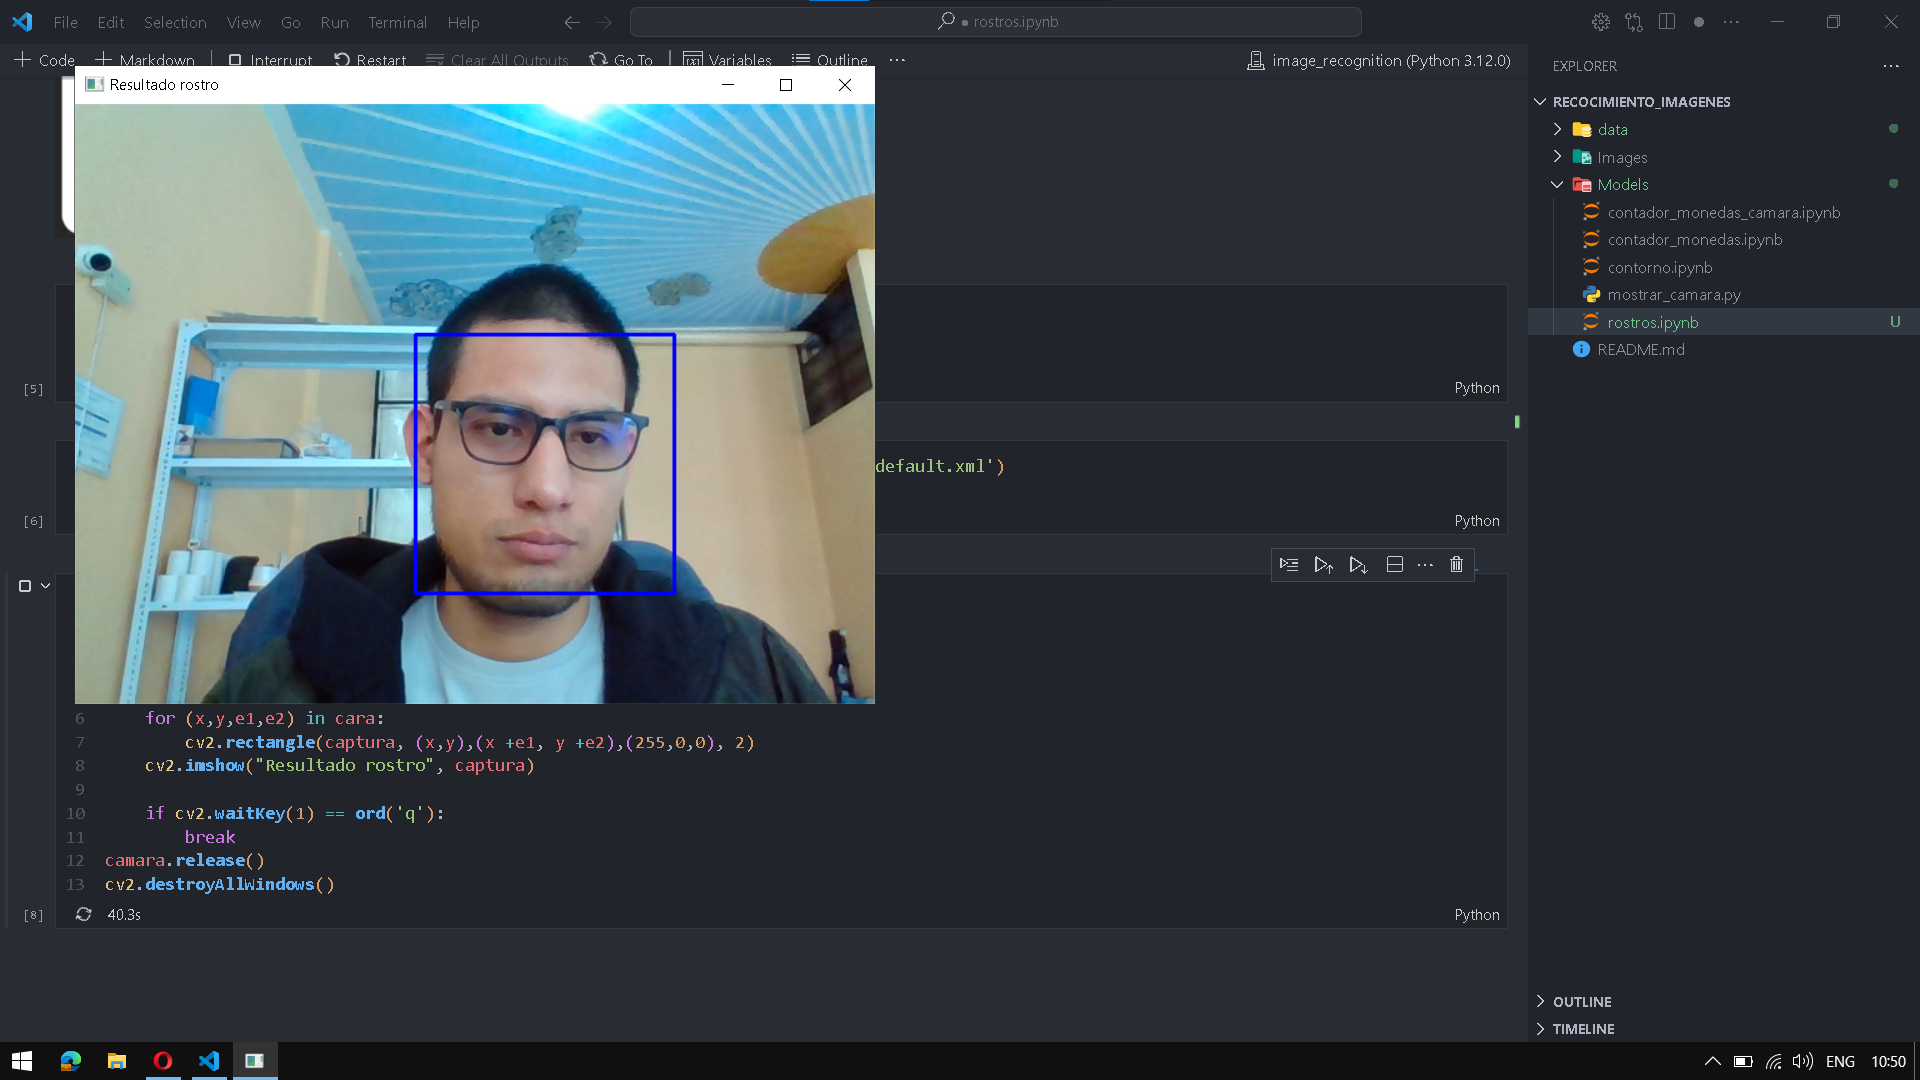

In [10]:
data = '../Data/Images'
lista_data = os.listdir(data)
print(lista_data)

['Auron', 'Elon', 'Marcos']


In [11]:
# etiquetas para diferenciar entre imagenes
ids = []
rostros_data = []
id = 0 # para que arranque

for fila in lista_data:
    ruta = data + '/' + fila
    print("iniciando lectura")
    for archivo in os.listdir(ruta):
        print("Imagenes: ", fila + '/' + archivo)
        ids.append(id)
        rostros_data.append(cv2.imread(ruta + '/' + archivo, 0))
    id = id + 1

entrenamientoEigenFaceRecognizer = cv2.face.EigenFaceRecognizer_create()
print("Iniciando el entrenamento")
entrenamientoEigenFaceRecognizer.train(rostros_data, np.array(ids))

entrenamientoEigenFaceRecognizer.write('entrenamientoEigenFaceRecognizer.xml')
print("Entrenameinto finalizado")


iniciando lectura
Imagenes:  Auron/imagen_0.jpg
Imagenes:  Auron/imagen_1.jpg
Imagenes:  Auron/imagen_10.jpg
Imagenes:  Auron/imagen_100.jpg
Imagenes:  Auron/imagen_101.jpg
Imagenes:  Auron/imagen_102.jpg
Imagenes:  Auron/imagen_103.jpg
Imagenes:  Auron/imagen_104.jpg
Imagenes:  Auron/imagen_105.jpg
Imagenes:  Auron/imagen_106.jpg
Imagenes:  Auron/imagen_107.jpg
Imagenes:  Auron/imagen_108.jpg
Imagenes:  Auron/imagen_109.jpg
Imagenes:  Auron/imagen_11.jpg
Imagenes:  Auron/imagen_110.jpg
Imagenes:  Auron/imagen_111.jpg
Imagenes:  Auron/imagen_112.jpg
Imagenes:  Auron/imagen_113.jpg
Imagenes:  Auron/imagen_114.jpg
Imagenes:  Auron/imagen_115.jpg
Imagenes:  Auron/imagen_116.jpg
Imagenes:  Auron/imagen_117.jpg
Imagenes:  Auron/imagen_118.jpg
Imagenes:  Auron/imagen_119.jpg
Imagenes:  Auron/imagen_12.jpg
Imagenes:  Auron/imagen_120.jpg
Imagenes:  Auron/imagen_121.jpg
Imagenes:  Auron/imagen_122.jpg
Imagenes:  Auron/imagen_123.jpg
Imagenes:  Auron/imagen_124.jpg
Imagenes:  Auron/imagen_125.j

In [5]:
data = '../Data/Images'
listaData = os.listdir(data)

In [12]:
entrenamientoEigenFaceRecognizer=cv2.face.EigenFaceRecognizer_create()
entrenamientoEigenFaceRecognizer.read('./entrenamientoEigenFaceRecognizer.xml')
ruidos=cv2.CascadeClassifier('../Libraries/haarcascades/haarcascade_frontalface_default.xml')
camara=cv2.VideoCapture(1)
while True:
    respuesta,captura=camara.read()
    if respuesta==False:break
    captura=imutils.resize(captura,width=640)
    grises=cv2.cvtColor(captura, cv2.COLOR_BGR2GRAY)
    idcaptura=grises.copy()
    cara=ruidos.detectMultiScale(grises,1.3,5)
    for(x,y,e1,e2) in cara:
        rostrocapturado=idcaptura[y:y+e2,x:x+e1]
        rostrocapturado=cv2.resize(rostrocapturado, (160,160),interpolation=cv2.INTER_CUBIC)
        resultado=entrenamientoEigenFaceRecognizer.predict(rostrocapturado)
        cv2.putText(captura, '{}'.format(resultado), (x,y-5), 1,1.3,(0,255,0),1,cv2.LINE_AA)
        if resultado[1]<8000:
            cv2.putText(captura, '{}'.format(listaData[resultado[0]]), (x,y-20), 2,1.1,(0,255,0),1,cv2.LINE_AA)
            cv2.rectangle(captura, (x,y), (x+e1,y+e2), (255,0,0),2)
        else:
            cv2.putText(captura,"No encontrado", (x,y-20), 2,0.7,(0,255,0),1,cv2.LINE_AA)
            cv2.rectangle(captura, (x,y), (x+e1,y+e2), (255,0,0),2)

       
    cv2.imshow("Resultados", captura)
    if cv2.waitKey(1)==ord('s'):
        break
camara.release()
cv2.destroyAllWindows()




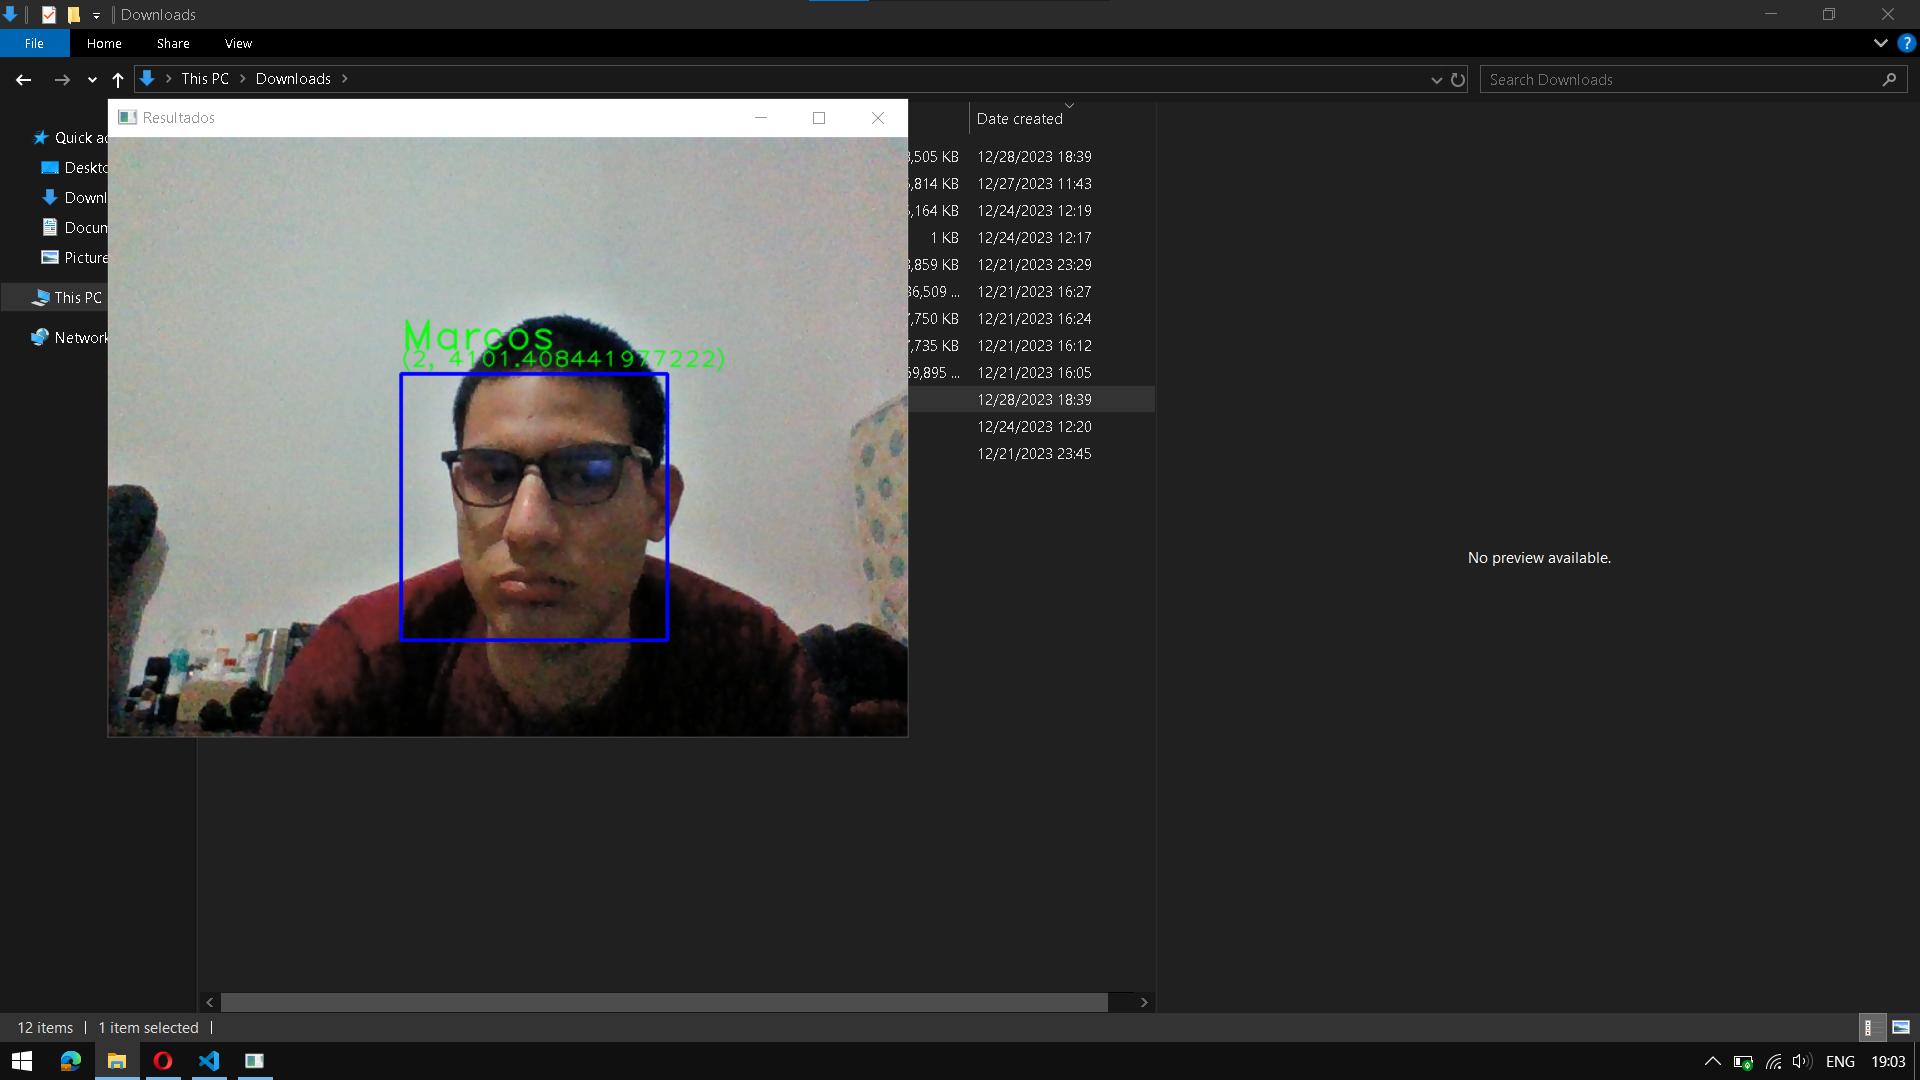